In [1]:
import pandas as pd
import numpy as np


In [2]:
files = {
    'train':'../data/nihcc_chest_xray/miccai2023_nih-cxr-lt_labels_train.csv',
    'val':'../data/nihcc_chest_xray/miccai2023_nih-cxr-lt_labels_val.csv',
    'test':'../data/nihcc_chest_xray/miccai2023_nih-cxr-lt_labels_test.csv',
}

In [18]:
all_df = pd.read_csv('../data/nihcc_chest_xray/Data_Entry_2017_v2020.csv')
all_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [19]:
filename = files['train']
df = pd.read_csv(filename)

In [20]:
temp = pd.merge(df, all_df, left_on='id', right_on='Image Index')
temp

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143000,0.143000
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143000,0.143000
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168000,0.168000
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,2,80,M,PA,2500,2048,0.171000,0.171000
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,00030789_000.png,0,0,0,0,0,0,0,0,1,...,Infiltration,0,30789,51,F,PA,2021,2021,0.194311,0.194311
78502,00030793_000.png,0,0,0,0,0,0,0,0,0,...,Mass|Nodule,0,30793,57,F,PA,2021,2021,0.194311,0.194311
78503,00030795_000.png,0,0,0,0,0,0,0,0,0,...,Pleural_Thickening,0,30795,52,F,PA,2021,2021,0.194311,0.194311
78504,00030801_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30801,38,M,PA,2500,2048,0.168000,0.168000


In [21]:
temp.to_csv('../data/nihcc_chest_xray/nihcc_chest_xray_training_samples.csv')

In [22]:
filename = files['val']
df = pd.read_csv(filename)
temp = pd.merge(df, all_df, left_on='id', right_on='Image Index')
temp

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000003_000.png,0,0,0,0,0,0,0,1,0,...,Hernia,7,3,81,F,PA,2582,2991,0.143000,0.143000
1,00000003_001.png,0,0,0,0,0,0,0,1,0,...,Hernia,0,3,74,F,PA,2500,2048,0.168000,0.168000
2,00000003_002.png,0,0,0,0,0,0,0,1,0,...,Hernia,1,3,75,F,PA,2048,2500,0.168000,0.168000
3,00000003_003.png,0,0,0,0,0,0,0,1,1,...,Hernia|Infiltration,2,3,76,F,PA,2698,2991,0.143000,0.143000
4,00000003_004.png,0,0,0,0,0,0,0,1,0,...,Hernia,3,3,77,F,PA,2500,2048,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12528,00030762_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30762,30,M,PA,2021,2021,0.194311,0.194311
12529,00030771_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30771,42,M,PA,2021,2021,0.194311,0.194311
12530,00030776_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30776,23,M,PA,2021,2021,0.194311,0.194311
12531,00030781_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30781,29,F,PA,2020,2021,0.194311,0.194311


In [23]:
temp.to_csv('../data/nihcc_chest_xray/nihcc_chest_xray_validation_samples.csv')

In [24]:
filename = files['test']
df = pd.read_csv(filename)
temp = pd.merge(df, all_df, left_on='id', right_on='Image Index')
temp

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000013_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,25,13,60,M,PA,2021,2021,0.194311,0.194311
1,00000013_001.png,0,0,0,0,0,1,0,0,0,...,Emphysema|Pneumothorax,26,13,60,M,AP,3056,2544,0.139000,0.139000
2,00000013_002.png,0,0,0,0,0,1,0,0,0,...,Emphysema|Pneumothorax,27,13,60,M,AP,3056,2544,0.139000,0.139000
3,00000013_003.png,0,0,0,0,0,0,0,0,0,...,Pleural_Thickening,28,13,60,M,AP,2996,2544,0.139000,0.139000
4,00000013_004.png,0,0,0,0,1,1,0,0,1,...,Effusion|Emphysema|Infiltration|Pneumothorax,29,13,60,M,AP,3056,2544,0.139000,0.139000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21076,00030800_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30800,33,F,PA,2048,2500,0.168000,0.168000
21077,00030802_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30802,28,M,PA,2048,2500,0.168000,0.168000
21078,00030803_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30803,42,F,PA,2048,2500,0.168000,0.168000
21079,00030804_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30804,29,F,PA,2048,2500,0.168000,0.168000


In [25]:
temp.to_csv('../data/nihcc_chest_xray/nihcc_chest_xray_testing_samples.csv')

In [4]:
df.loc[2]

id                            00000001_002.png
Atelectasis                                  0
Cardiomegaly                                 1
Consolidation                                0
Edema                                        0
Effusion                                     1
Emphysema                                    0
Fibrosis                                     0
Hernia                                       0
Infiltration                                 0
Mass                                         0
Nodule                                       0
Pleural Thickening                           0
Pneumonia                                    0
Pneumothorax                                 0
Pneumoperitoneum                             0
Pneumomediastinum                            0
Subcutaneous Emphysema                       0
Tortuous Aorta                               0
Calcification of the Aorta                   0
No Finding                                   0
subj_id      

In [5]:
df.head()

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [6]:
image_ids = df['id']  # Assuming 'id' column holds image filenames

# Extract the columns for the medical conditions (20 labels)
labels = df.iloc[:, 1:21]  # Assuming the conditions are in columns 1 to 20

In [7]:
import numpy as np

# Convert labels to a numpy array
labels_array = np.array(labels)

# Check the shape of the labels
print(labels_array.shape)  # Should give (number_of_images, 20)

(78506, 20)


In [8]:
labels_array[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [9]:
df.describe()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
count,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,...,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000,78506.000000
mean,0.096642,0.020253,0.033450,0.016343,0.100871,0.016903,0.014496,0.001656,0.162268,0.046990,...,0.025450,0.010267,0.030979,0.002726,0.001121,0.012190,0.007617,0.004688,0.568428,13305.909268
std,0.295472,0.140866,0.179809,0.126790,0.301160,0.128910,0.119523,0.040660,0.368699,0.211619,...,0.157489,0.100804,0.173261,0.052139,0.033462,0.109735,0.086944,0.068305,0.495299,8078.794634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6477.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12757.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19431.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30801.000000


In [ ]:
df['Cardiomegaly'].value_counts()

Cardiomegaly
0    76916
1     1590
Name: count, dtype: int64

In [ ]:
for column in df.columns:
    if column == 'id' or column == 'subj_id':
        continue
    # print(column)
    print(df[column].value_counts())

Atelectasis
0    70919
1     7587
Name: count, dtype: int64
Cardiomegaly
0    76916
1     1590
Name: count, dtype: int64
Consolidation
0    75880
1     2626
Name: count, dtype: int64
Edema
0    77223
1     1283
Name: count, dtype: int64
Effusion
0    70587
1     7919
Name: count, dtype: int64
Emphysema
0    77179
1     1327
Name: count, dtype: int64
Fibrosis
0    77368
1     1138
Name: count, dtype: int64
Hernia
0    78376
1      130
Name: count, dtype: int64
Infiltration
0    65767
1    12739
Name: count, dtype: int64
Mass
0    74817
1     3689
Name: count, dtype: int64
Nodule
0    74147
1     4359
Name: count, dtype: int64
Pleural Thickening
0    76508
1     1998
Name: count, dtype: int64
Pneumonia
0    77700
1      806
Name: count, dtype: int64
Pneumothorax
0    76074
1     2432
Name: count, dtype: int64
Pneumoperitoneum
0    78292
1      214
Name: count, dtype: int64
Pneumomediastinum
0    78418
1       88
Name: count, dtype: int64
Subcutaneous Emphysema
0    77549
1      957
Name:

In [10]:
all_df = pd.read_csv('../data/nihcc_chest_xray/Data_Entry_2017_v2020.csv')

In [11]:
all_df['Patient Age'].value_counts()

Patient Age
58    2969
57    2944
52    2937
55    2918
56    2847
      ... 
91      11
89       8
92       6
94       3
95       1
Name: count, Length: 96, dtype: int64

In [13]:
df

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,00030789_000.png,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,30789
78502,00030793_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30793
78503,00030795_000.png,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,30795
78504,00030801_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,30801


In [12]:
all_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [ ]:
column_names = ['Age > 55', 'Age > 55', 'Age > 55', 'Age > 55', 'Age > 55', 'Age > 55']
all_df['Age > 55'] = all_df['Patient Age'] > 55
all_df['Age > 55'] = all_df['Age > 55'].astype(int)
all_df['Age > 55'].value_counts()

In [ ]:

all_df['Age > 55'] = all_df['Patient Age'] > 55
all_df['Age > 55'] = all_df['Age > 55'].astype(int)
all_df['Age > 55'].value_counts()

Age > 55
0    74464
1    37656
Name: count, dtype: int64

In [ ]:
all_df['Age > 50'].value_counts()

Age > 50
False    60568
True     51552
Name: count, dtype: int64

In [ ]:
all_df['Age > 60'].value_counts()

Age > 60
False    88031
True     24089
Name: count, dtype: int64

In [ ]:
all_df['Age > 65'].value_counts()

Age > 65
False    98657
True     13463
Name: count, dtype: int64

In [ ]:
age_counts

Patient Age
58    2969
57    2944
52    2937
55    2918
56    2847
      ... 
91      11
89       8
92       6
94       3
95       1
Name: count, Length: 96, dtype: int64

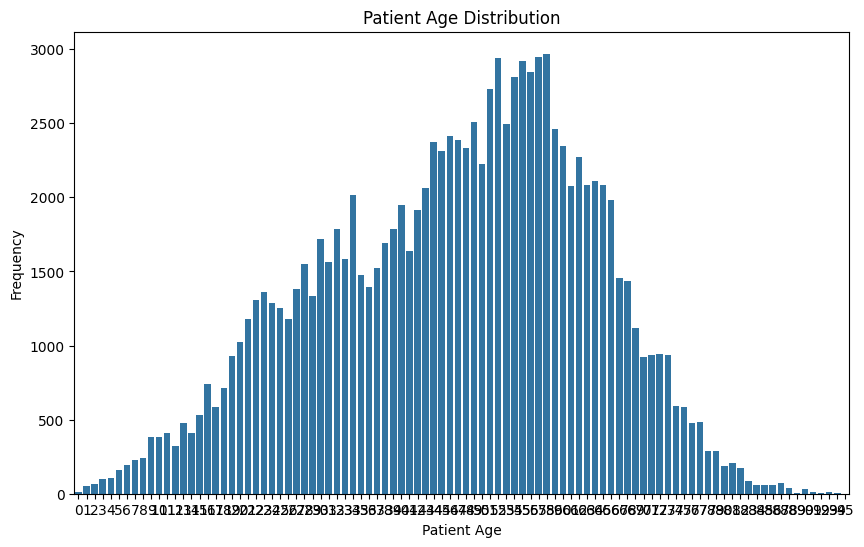

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the value counts
age_counts = all_df['Patient Age'].value_counts().reset_index()
age_counts.columns = ['Patient Age', 'Frequency']

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Patient Age', y='Frequency', data=age_counts)

# Adding labels and title
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Patient Age Distribution')

# Show the plot
plt.show()

In [ ]:
all_df['Patient Gender'].value_counts()

Patient Gender
M    63340
F    48780
Name: count, dtype: int64

In [14]:
all_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')

In [ ]:
all_df[['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]']]

In [ ]:
all_df
columns = ['Patient Age', 'Patient Gender']

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [ ]:
all_df[['Image Index', 'Follow-up #']].head(20)

,Image Index,Follow-up #
0,00000001_000.png,0
1,00000001_001.png,1
2,00000001_002.png,2
3,00000002_000.png,0
4,00000003_001.png,0
5,00000003_002.png,1
6,00000003_003.png,2
7,00000003_004.png,3
8,00000003_005.png,4
9,00000003_006.png,5


In [ ]:
df

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,00030789_000.png,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,30789
78502,00030793_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30793
78503,00030795_000.png,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,30795
78504,00030801_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,30801


In [ ]:
all_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Age > 65,Age > 60,Age > 50,Age > 55
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,False,False,True,True
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,False,False,True,True
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,False,False,True,True
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,True,True,True,True
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168,False,False,False,False
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168,False,False,False,False
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,False,False,False,False
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168,False,False,False,False


In [ ]:
temp['Patient Gender'] = temp['Patient Gender'].replace({'M':0, 'F':1})
temp

C:\Users\rrahman3\AppData\Local\Temp\ipykernel_2600\708795557.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp['Patient Gender'] = temp['Patient Gender'].replace({'M':0, 'F':1})


,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Age > 65,Age > 60,Age > 50,Age > 55
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,PA,2682,2749,0.143000,0.143000,False,False,True,True
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,PA,2894,2729,0.143000,0.143000,False,False,True,True
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,PA,2500,2048,0.168000,0.168000,False,False,True,True
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,PA,2500,2048,0.171000,0.171000,True,True,True,True
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,AP,2500,2048,0.168000,0.168000,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,00030789_000.png,0,0,0,0,0,0,0,0,1,...,1,PA,2021,2021,0.194311,0.194311,False,False,True,False
78502,00030793_000.png,0,0,0,0,0,0,0,0,0,...,1,PA,2021,2021,0.194311,0.194311,False,False,True,True
78503,00030795_000.png,0,0,0,0,0,0,0,0,0,...,1,PA,2021,2021,0.194311,0.194311,False,False,True,False
78504,00030801_000.png,0,0,0,0,0,0,0,0,0,...,0,PA,2500,2048,0.168000,0.168000,False,False,False,False


In [17]:
df

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding,subj_id
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,00030789_000.png,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,30789
78502,00030793_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30793
78503,00030795_000.png,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,30795
78504,00030801_000.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,30801


In [15]:
temp = pd.merge(df, all_df, left_on='id', right_on='Image Index')
temp

,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,...,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,0,1,0,0,0,0,0,0,0,...,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143000,0.143000
1,00000001_001.png,0,1,0,0,0,1,0,0,0,...,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143000,0.143000
2,00000001_002.png,0,1,0,0,1,0,0,0,0,...,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168000,0.168000
3,00000002_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,2,80,M,PA,2500,2048,0.171000,0.171000
4,00000004_000.png,0,0,0,0,0,0,0,0,0,...,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,00030789_000.png,0,0,0,0,0,0,0,0,1,...,Infiltration,0,30789,51,F,PA,2021,2021,0.194311,0.194311
78502,00030793_000.png,0,0,0,0,0,0,0,0,0,...,Mass|Nodule,0,30793,57,F,PA,2021,2021,0.194311,0.194311
78503,00030795_000.png,0,0,0,0,0,0,0,0,0,...,Pleural_Thickening,0,30795,52,F,PA,2021,2021,0.194311,0.194311
78504,00030801_000.png,0,0,0,0,0,0,0,0,0,...,No Finding,0,30801,38,M,PA,2500,2048,0.168000,0.168000


In [16]:
temp.columns

Index(['id', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding', 'subj_id',
       'Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')

In [26]:
labels_df = temp[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
                            'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
                            'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
                            'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
                            'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding'
                        ]
        ]

labels_df

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural Thickening,Pneumonia,Pneumothorax,Pneumoperitoneum,Pneumomediastinum,Subcutaneous Emphysema,Tortuous Aorta,Calcification of the Aorta,No Finding
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
temp[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
                            'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
                            'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
                            'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
                            'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding'
                        ]].loc[0]

Atelectasis                   0
Cardiomegaly                  0
Consolidation                 0
Edema                         0
Effusion                      0
Emphysema                     0
Fibrosis                      0
Hernia                        0
Infiltration                  0
Mass                          0
Nodule                        0
Pleural Thickening            0
Pneumonia                     0
Pneumothorax                  0
Pneumoperitoneum              0
Pneumomediastinum             0
Subcutaneous Emphysema        0
Tortuous Aorta                0
Calcification of the Aorta    0
No Finding                    1
Name: 0, dtype: int64

## Creating ImageNet like fodlers

In [36]:
train_df = pd.read_csv('../data/nihcc_chest_xray/nihcc_chest_xray_training_samples.csv')

In [37]:
train_df

,Unnamed: 0,id,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,...,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,0,00000001_000.png,0,1,0,0,0,0,0,0,...,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143000,0.143000
1,1,00000001_001.png,0,1,0,0,0,1,0,0,...,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143000,0.143000
2,2,00000001_002.png,0,1,0,0,1,0,0,0,...,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168000,0.168000
3,3,00000002_000.png,0,0,0,0,0,0,0,0,...,No Finding,0,2,80,M,PA,2500,2048,0.171000,0.171000
4,4,00000004_000.png,0,0,0,0,0,0,0,0,...,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78501,78501,00030789_000.png,0,0,0,0,0,0,0,0,...,Infiltration,0,30789,51,F,PA,2021,2021,0.194311,0.194311
78502,78502,00030793_000.png,0,0,0,0,0,0,0,0,...,Mass|Nodule,0,30793,57,F,PA,2021,2021,0.194311,0.194311
78503,78503,00030795_000.png,0,0,0,0,0,0,0,0,...,Pleural_Thickening,0,30795,52,F,PA,2021,2021,0.194311,0.194311
78504,78504,00030801_000.png,0,0,0,0,0,0,0,0,...,No Finding,0,30801,38,M,PA,2500,2048,0.168000,0.168000


In [48]:
train_df.columns

Index(['Unnamed: 0', 'id', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous_Aorta', 'Calcification_of_the_Aorta', 'No_Finding', 'subj_id',
       'Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')

In [ ]:
train_df.rename()

In [39]:
classes = ['Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous_Emphysema',
       'Tortuous_Aorta', 'Calcification_of_the_Aorta', 'No_Finding']

In [57]:
train_df = train_df.rename(columns={'Subcutaneous Emphysema':'Subcutaneous_Emphysema', 'Pleural Thickening': 'Pleural_Thickening', 'SubcutaneousEmphysema': 'Subcutaneous_Emphysema', 'Tortuous Aorta':'Tortuous_Aorta', 'Calcification of the Aorta':'Calcification_of_the_Aorta', 'No Finding':'No_Finding'})

In [40]:
len(classes)

20

In [73]:
import os
src_dir = "../data/nihcc_chest_xray/xray_images"
dst_dir = "../data/nihcc_chest_xray/images/train"
os.makedirs("../data/nihcc_chest_xray/images/")
os.makedirs("../data/nihcc_chest_xray/images/train/")
for class_name in classes:
    class_dir = os.path.join(dst_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: '../data/nihcc_chest_xray/images/'

In [42]:
train_df['id']

0        00000001_000.png
1        00000001_001.png
2        00000001_002.png
3        00000002_000.png
4        00000004_000.png
               ...       
78501    00030789_000.png
78502    00030793_000.png
78503    00030795_000.png
78504    00030801_000.png
78505    00030801_001.png
Name: id, Length: 78506, dtype: object

In [59]:
def find_classes(row):
    class_lists = []
    for class_name in classes:
        if row[class_name]:
            class_lists.append(class_name)
        
    return class_lists
        

In [65]:
import shutil
import os
import pandas as pd

train_df = pd.read_csv('../data/nihcc_chest_xray/nihcc_chest_xray_training_samples.csv')

classes = ['Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous_Emphysema',
       'Tortuous_Aorta', 'Calcification_of_the_Aorta', 'No_Finding']

train_df = train_df.rename(columns={'Subcutaneous Emphysema':'Subcutaneous_Emphysema', 'Pleural Thickening': 'Pleural_Thickening', 'SubcutaneousEmphysema': 'Subcutaneous_Emphysema', 'Tortuous Aorta':'Tortuous_Aorta', 'Calcification of the Aorta':'Calcification_of_the_Aorta', 'No Finding':'No_Finding'})

src_dir = "data/nihcc_chest_xray/xray_images"
dst_dir = "data/nihcc_chest_xray/images/train"
os.makedirs("data/nihcc_chest_xray/images/")
os.makedirs("data/nihcc_chest_xray/images/train/")
for class_name in classes:
    class_dir = os.path.join(dst_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
        
def find_classes(row):
    class_lists = []
    for class_name in classes:
        if row[class_name]:
            class_lists.append(class_name)
        
    return class_lists

for idx, row in train_df.iterrows():
    # print(row)
    img_file = row['id']
    class_lables = find_classes(row)
    source_img_path = os.path.join(src_dir, img_file)
    if os.path.exists(source_img_path):
        for class_name in class_lables:
            target_img_path = os.path.join(dst_dir, class_name, img_file)
            shutil.copy(source_img_path, target_img_path)
        print(idx, source_img_path, target_img_path)

True

In [ ]:
import shutil

for idx, row in train_df.iterrows():
    # print(row)
    img_file = row['id']
    class_lables = find_classes(row)
    source_img_path = os.path.join(src_dir, img_file)
    if os.path.exists(source_img_path):
        for class_name in class_lables:
            target_img_path = os.path.join(dst_dir, class_name, img_file)
            shutil.copy(source_img_path, target_img_path)
        print(idx, source_img_path, target_img_path)
        # break



0 ../data/nihcc_chest_xray/xray_images\00000001_000.png ../data/nihcc_chest_xray/images/train\Cardiomegaly\00000001_000.png
1 ../data/nihcc_chest_xray/xray_images\00000001_001.png ../data/nihcc_chest_xray/images/train\Emphysema\00000001_001.png
2 ../data/nihcc_chest_xray/xray_images\00000001_002.png ../data/nihcc_chest_xray/images/train\Effusion\00000001_002.png
3 ../data/nihcc_chest_xray/xray_images\00000002_000.png ../data/nihcc_chest_xray/images/train\No_Finding\00000002_000.png
4 ../data/nihcc_chest_xray/xray_images\00000004_000.png ../data/nihcc_chest_xray/images/train\Nodule\00000004_000.png
5 ../data/nihcc_chest_xray/xray_images\00000005_000.png ../data/nihcc_chest_xray/images/train\No_Finding\00000005_000.png
6 ../data/nihcc_chest_xray/xray_images\00000005_001.png ../data/nihcc_chest_xray/images/train\No_Finding\00000005_001.png
7 ../data/nihcc_chest_xray/xray_images\00000005_002.png ../data/nihcc_chest_xray/images/train\No_Finding\00000005_002.png
8 ../data/nihcc_chest_xray/xr